## Support Vector Regression (SVR)

Predicted salary for level 6.5: 170370.0204065024

Comparison of Actual vs Predicted Salaries:
   Level  Actual Salary  Predicted Salary
0      1          45000      73474.156157
1      2          50000      70786.945846
2      3          60000      88213.009021
3      4          80000     108254.985750
4      5         110000     122574.522506
5      6         150000     145503.106886
6      7         200000     209410.231329
7      8         300000     330606.892046
8      9         500000     471671.955873
9     10        1000000     557821.758999


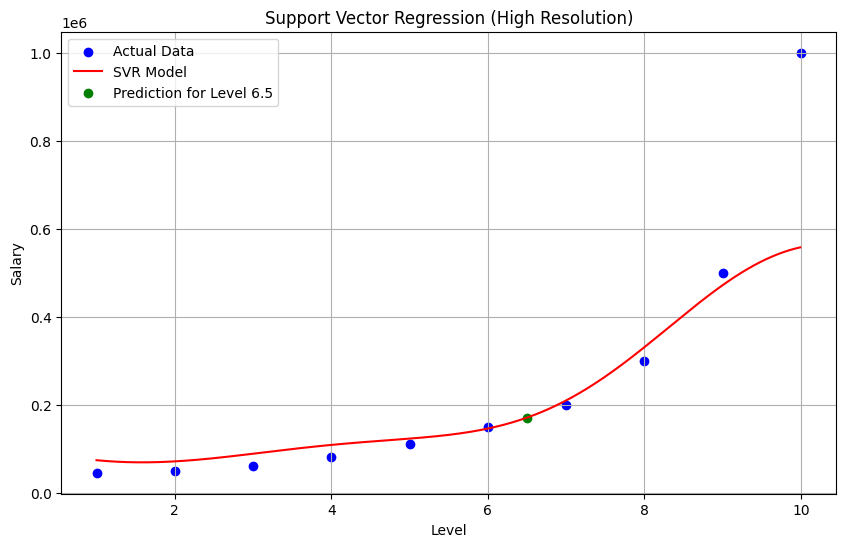

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../datasets/position-salaries.csv')
# Extract features and target variable
X = data.iloc[:, 1].values  # Level
y = data.iloc[:, -1].values  # Salary

# Feature scaling for both dependent and independent variables
from sklearn.preprocessing import StandardScaler
X = X.reshape(-1, 1)  
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y = y.reshape(-1, 1)  
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_scaled, y_scaled.ravel())

# Predicting a new result
y_pred_scaled = svr.predict(scaler_X.transform(np.array([[6.5]])))
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
print(f"Predicted salary for level 6.5: {y_pred[0][0]}")

# Comparing actual vs predicted values
comparison_df = pd.DataFrame({
    'Level': X.flatten(),
    'Actual Salary': y.flatten(),
    'Predicted Salary': scaler_y.inverse_transform(svr.predict(X_scaled).reshape(-1, 1)).flatten()
})
print("\nComparison of Actual vs Predicted Salaries:")
print(comparison_df)

# Visualizing the SVR results with higher resolution
X_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')    
plt.plot(X_grid, scaler_y.inverse_transform(svr.predict(scaler_X.transform(X_grid)).reshape(-1, 1)), color='red', label='SVR Model')
plt.scatter(6.5, y_pred, color='green', label='Prediction for Level 6.5')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Support Vector Regression (High Resolution)')
plt.legend()
plt.grid(True)
plt.show()
